# Palmer Penguins

This project aimed to build a machine learning model to classify penguin species based on physical features such as beak length (culmen length), beak depth (culmen depth), flipper length, and body mass. The analysis and model development process provided valuable insights into the dataset and model performance.

The primary objective of this project is to build a machine learning model that can predict the species of penguins based on measurements of their physical features, such as:

- Culmen Length (the length of the upper beak)
- Culmen Depth (the width of the upper beak)
- Flipper Length (the length of the penguin’s flippers)
- Body Mass (the weight of the penguin)

These features are used as inputs for a classification algorithm, with the goal of predicting one of the three species:

- Adelie
- Chinstrap
- Gentoo

#### Datasets

This dataset contains the following variables:

- **species**: The species of the penguin (Adelie, Chinstrap, Gentoo).
- **culmen_length_mm**: The length of the penguin’s culmen (in mm).
- **culmen_depth_mm**: The depth of the penguin’s culmen (in mm).
- **flipper_length_mm**: The length of the penguin’s flipper (in mm).
- **body_mass_g**: The body mass of the penguin (in grams).
- **island**: The island where the penguin was observed (Biscoe, Dream, Torgersen).
- **sex**: The sex of the penguin (male or female).

### Step 1: Import Libraries

In [4]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Step 2: Load Data

In [2]:
zip_file_path = 'Palmer Penguins Dataset.zip' 
extracted_folder = 'Palmer_Penguins_Data/'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Path to the CSV file
penguins_size_file = extracted_folder + 'penguins_size.csv'

# Load the dataset
penguins_data = pd.read_csv(penguins_size_file)

# Display basic info
print("First few rows of the dataset:")
penguins_data.head()

First few rows of the dataset:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Step 3: Exploratory Data Analysis

In [5]:
print("\nColumns in the dataset:")
print(penguins_data.columns)

print("\nData types of the dataset:")
print(penguins_data.dtypes)

print("\nMissing values in the dataset:")
print(penguins_data.isnull().sum())


Columns in the dataset:
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Data types of the dataset:
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Missing values in the dataset:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


### Step 4: Clean Data

In [6]:
# Handle Missing Values
# Impute missing values using species-specific medians for numerical features and mode for 'sex'
for species in penguins_data['species'].unique():
    species_data = penguins_data[penguins_data['species'] == species]
    for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        median_value = species_data[column].median()
        penguins_data.loc[(penguins_data['species'] == species) & (penguins_data[column].isnull()), column] = median_value

# Impute missing values in 'sex' column with the mode
penguins_data['sex'] = penguins_data['sex'].fillna(penguins_data['sex'].mode()[0])

# Remove rows where 'sex' is '.'
penguins_data = penguins_data[penguins_data['sex'].isin(['MALE', 'FEMALE'])]

There’s an effort to handle outliers in the data to improve model performance. Outliers can affect the accuracy of the model, so cleaning and transforming the data to handle these outliers is an important part of the preprocessing steps.

In [7]:
# Handle Outliers using Z-scores

# This visualization shows the spread of flipper length for each species. The box represents the interquartile range (IQR), while the line inside the box is the median. 
# Outliers are displayed as points outside the whiskers.

numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
z_scores = np.abs(zscore(penguins_data[numerical_columns]))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).all(axis=1)
penguins_data = penguins_data[~outliers]

# Encode Categorical Variables (One-hot encoding for 'species')
penguins_data_encoded = pd.get_dummies(penguins_data, columns=['species'], drop_first=True)

In [29]:
penguins_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.915160,17.152770,200.880466,4200.655977
std,5.461589,1.974927,14.050254,801.575527
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.550000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Key Findings

- **Data Distribution**: The data appears to be reasonably spread out across the ranges, with moderate variability in most features. The presence of a small difference between the mean and median suggests that the distribution is relatively balanced, although there might be slight skewing in a few features.
- **Central Tendency**: The mean and median being close to each other for most of the features indicate that the data isn't highly skewed in one direction.
- **Variation**: The standard deviation values give you an idea of how much the values deviate from the mean, with features like body mass showing more variation compared to culmen depth.

### Step 5: Visualize the Data

#### Ploting Numerical Data

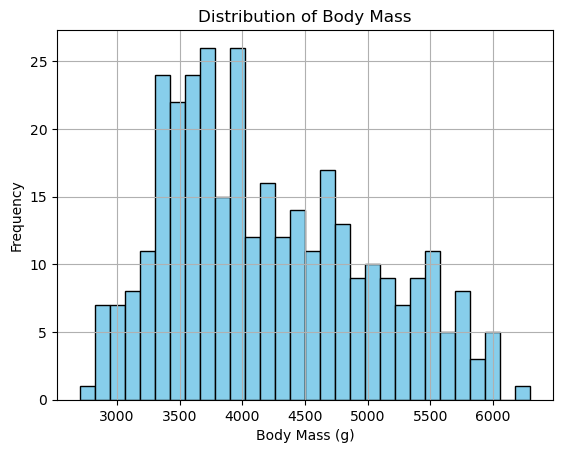

In [8]:
#  Histogram of Body Mass

# Histograms are used to visualize the distribution of numerical data.
# The data is divided into bins, and the height of each bar represents the frequency or count of data points falling within that bin.

plt.hist(penguins_data['body_mass_g'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_10836\2553478732.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(flipper_lengths, labels=species_groups.groups.keys(), patch_artist=True)


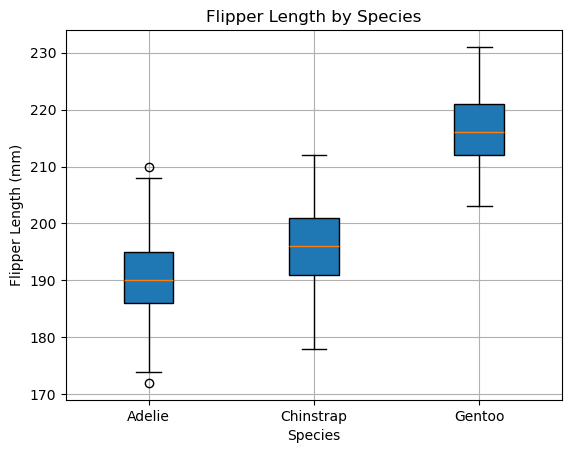

In [9]:
# Boxplot of Flipper Length by Species

#  Boxplots are effective for visualizing the distribution, central tendency, and spread of numerical data.
# They display the median, quartiles, and outliers in the data distribution.

species_groups = penguins_data.groupby('species')['flipper_length_mm']
flipper_lengths = [species_groups.get_group(species) for species in species_groups.groups]
plt.boxplot(flipper_lengths, labels=species_groups.groups.keys(), patch_artist=True)
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.grid(True)
plt.show()

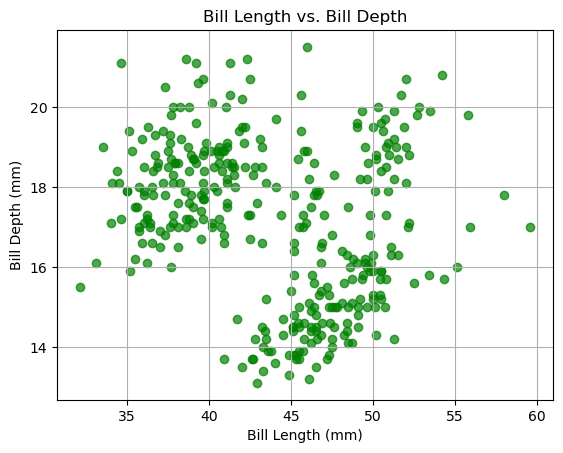

In [10]:
# Scatterplot of Bill Length vs. Bill Depth

# Scatterplots are useful for visualizing the relationship between two numerical variables.
# Each data point is represented by a marker on the plot, and the position of the marker corresponds to the values of the two variables.

plt.scatter(penguins_data['culmen_length_mm'], penguins_data['culmen_depth_mm'], color='g', alpha=0.7)
plt.title('Bill Length vs. Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid(True)
plt.show()

#### Plotting Categorical Data

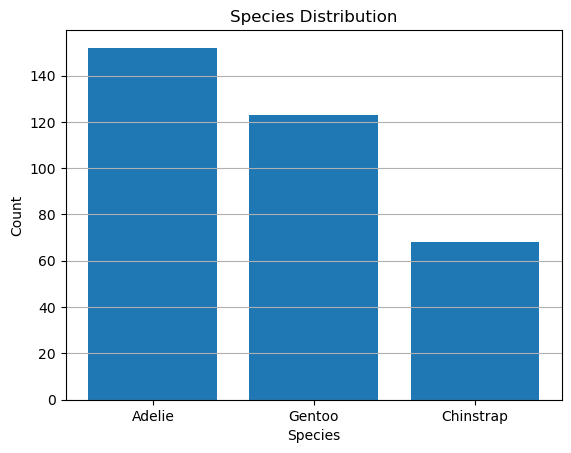

In [11]:
# Bar Chart of Species Counts

plt.bar(penguins_data['species'].value_counts().index, penguins_data['species'].value_counts())

plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid(axis='y') # Add horizontal grid lines only

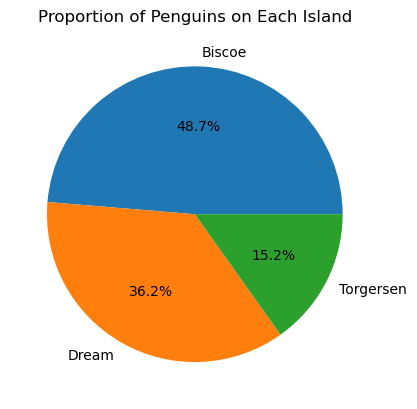

In [12]:
# Pie Chart of Island Proportions

plt.pie(penguins_data['island'].value_counts(), labels=penguins_data['island'].value_counts().index, autopct='%1.1f%%')
plt.title('Proportion of Penguins on Each Island')
plt.show()

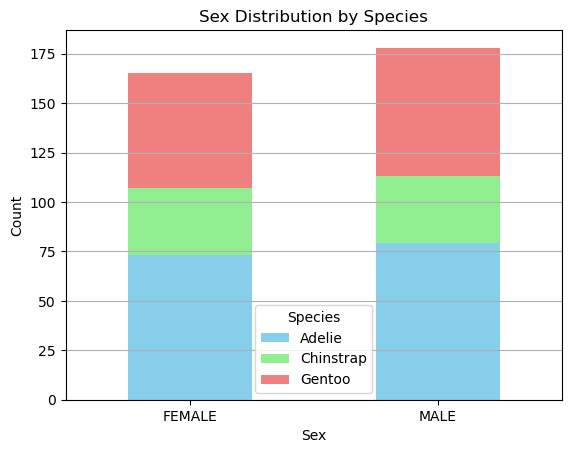

In [13]:
# Stacked Bar Chart of Sex by Species

sex_species_ct = pd.crosstab(index=penguins_data['sex'], columns=penguins_data['species'])
sex_species_ct.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Sex Distribution by Species')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Species')
plt.show()

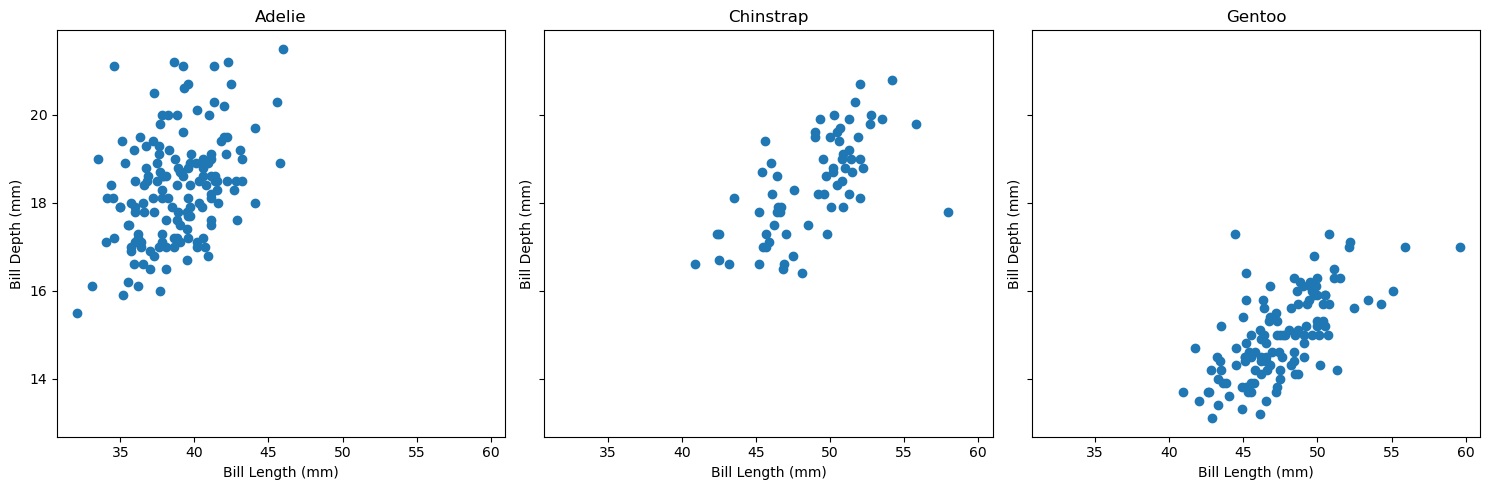

In [14]:
# Scatter Plot for Bill Length vs Bill Depth (Separate by Species)
fig, axes = plt.subplots(nrows=1, ncols=len(penguins_data['species'].unique()), figsize=(15, 5), sharex=True, sharey=True)
species = penguins_data['species'].unique()
for i, specie in enumerate(species):
    specie_data = penguins_data[penguins_data['species'] == specie]
    axes[i].scatter(specie_data['culmen_length_mm'], specie_data['culmen_depth_mm'], label=specie)
    axes[i].set_title(specie)
    axes[i].set_xlabel('Bill Length (mm)')
    axes[i].set_ylabel('Bill Depth (mm)')
plt.tight_layout()
plt.show()

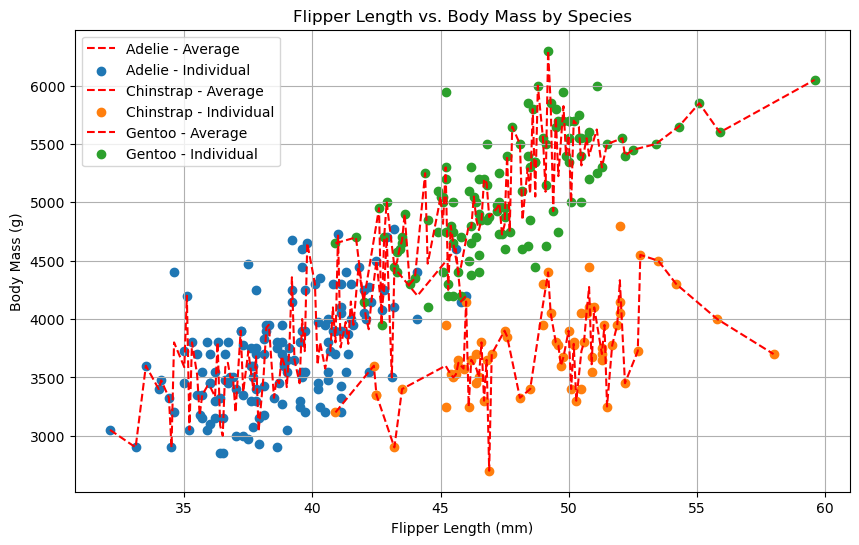

In [15]:
# Line Plot of Flipper Length vs. Body Mass (by Species)
data = penguins_data[['culmen_length_mm', 'body_mass_g', 'species']]
fig, ax = plt.subplots(figsize=(10, 6))
for specie in species:
    specie_data = data[data['species'] == specie]
    avg_body_mass = specie_data.groupby('culmen_length_mm')['body_mass_g'].mean()
    ax.plot(avg_body_mass.index, avg_body_mass.values, label=f'{specie} - Average', color='red', linestyle='--')
    ax.scatter(specie_data['culmen_length_mm'], specie_data['body_mass_g'], label=f'{specie} - Individual')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('Flipper Length vs. Body Mass by Species')
ax.legend()
plt.grid(True)
plt.show()

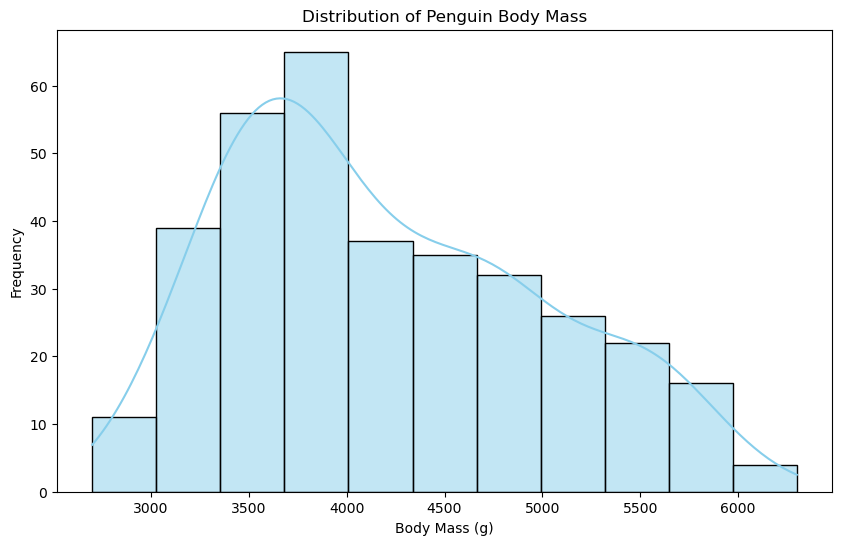

In [17]:
# Distribution of Body Mass (After Cleaning)
plt.figure(figsize=(10, 6))
sns.histplot(penguins_data['body_mass_g'], kde=True, color='skyblue')
plt.title('Distribution of Penguin Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_10836\1484183308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species_Gentoo', y='body_mass_g', data=penguins_data_encoded, palette='Set2')


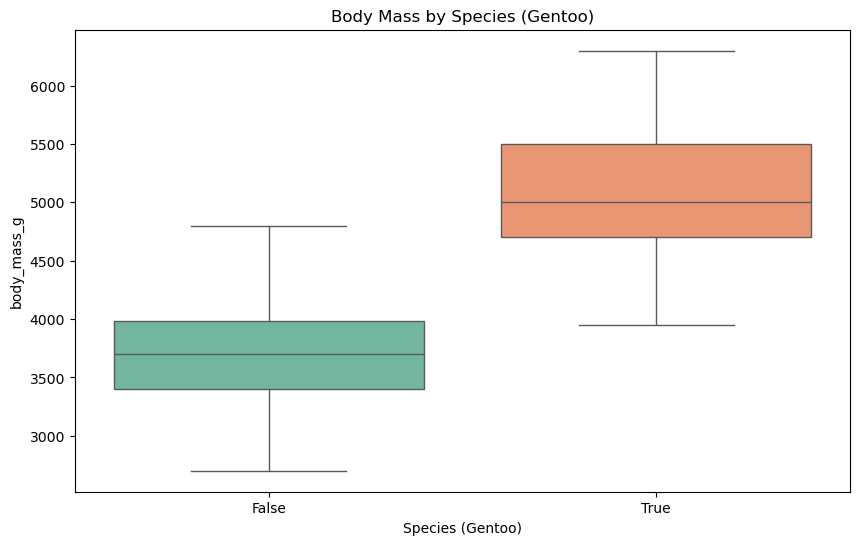

C:\Users\milto\AppData\Local\Temp\ipykernel_10836\1484183308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species_Chinstrap', y='body_mass_g', data=penguins_data_encoded, palette='Set2')


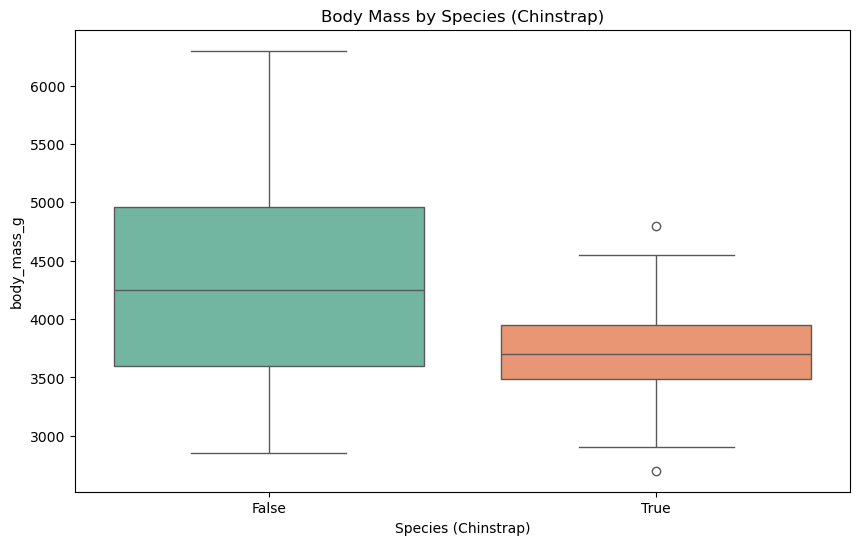

In [18]:
# Boxplot for Species (Gentoo and Chinstrap)
plt.figure(figsize=(10, 6))
sns.boxplot(x='species_Gentoo', y='body_mass_g', data=penguins_data_encoded, palette='Set2')
plt.title('Body Mass by Species (Gentoo)')
plt.xlabel('Species (Gentoo)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species_Chinstrap', y='body_mass_g', data=penguins_data_encoded, palette='Set2')
plt.title('Body Mass by Species (Chinstrap)')
plt.xlabel('Species (Chinstrap)')
plt.show()


Correlation matrix after handling outliers:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.237739           0.658271   
culmen_depth_mm           -0.237739         1.000000          -0.584974   
flipper_length_mm          0.658271        -0.584974           1.000000   
body_mass_g                0.596688        -0.473250           0.871507   

                   body_mass_g  
culmen_length_mm      0.596688  
culmen_depth_mm      -0.473250  
flipper_length_mm     0.871507  
body_mass_g           1.000000  


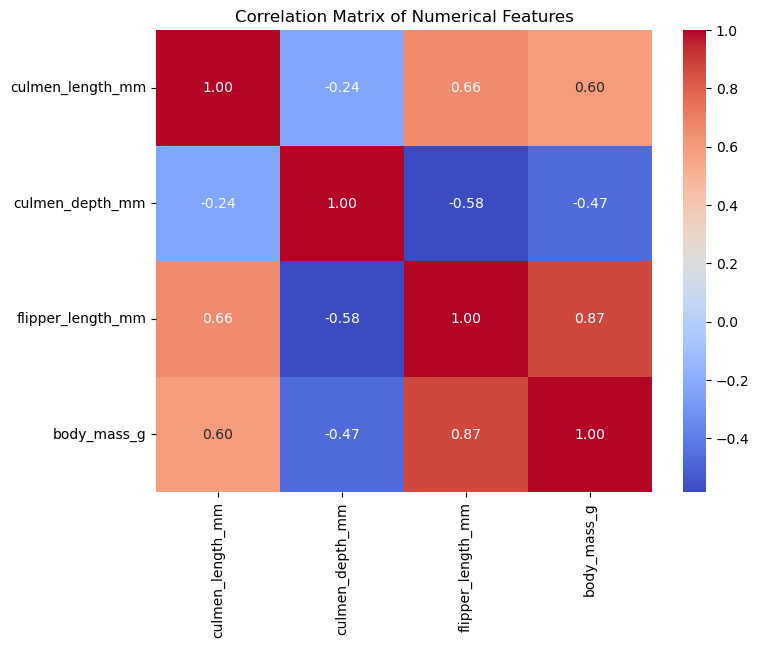

In [19]:
# Correlation Matrix of Numerical Features
correlation = penguins_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print("\nCorrelation matrix after handling outliers:")
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Key Findings

- The strongest correlation is between flipper_length_mm and body_mass_g (0.87), suggesting that these two features are strongly related. Larger penguins (in terms of body mass) tend to have longer flippers.
- culmen_length_mm and flipper_length_mm also show a moderate positive correlation (0.66), indicating a relationship between the length of the beak and the flipper size, though not as strong as the flipper-to-body-mass correlation.
- culmen_depth_mm has a somewhat weak to moderate inverse relationship with other features, particularly with flipper_length_mm and body_mass_g.

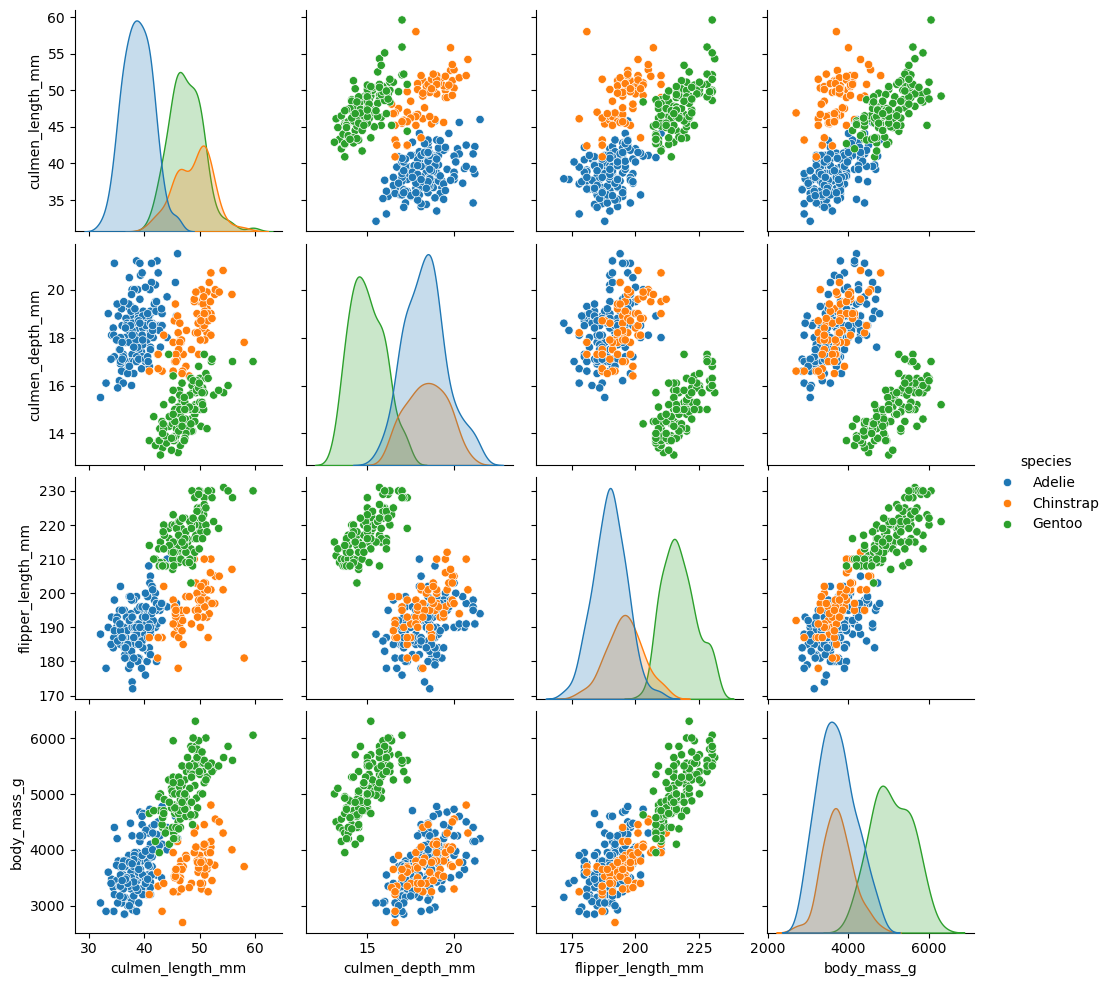

In [20]:
# Pairplot of Dataset
sns.pairplot(penguins_data, hue='species')
plt.show()

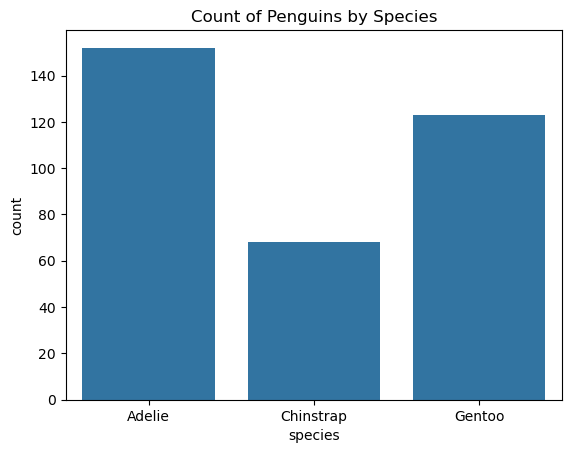

In [21]:
# Count Plot for Species
sns.countplot(data=penguins_data, x='species')
plt.title('Count of Penguins by Species')
plt.show()

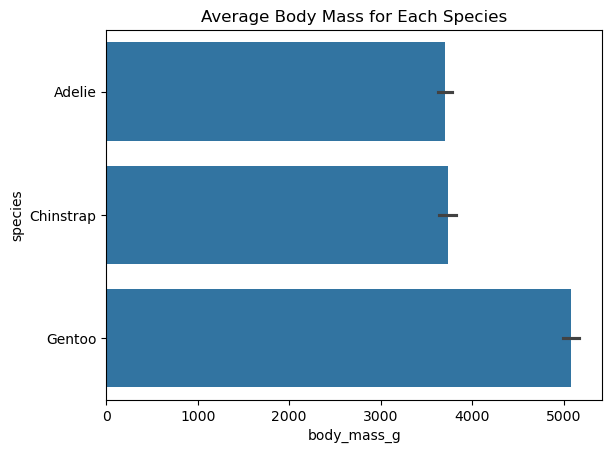

In [22]:
# Barplot of Average Body Mass for Each Species
sns.barplot(data=penguins_data, y='species', x='body_mass_g', orient='h')
plt.title('Average Body Mass for Each Species')
plt.show()

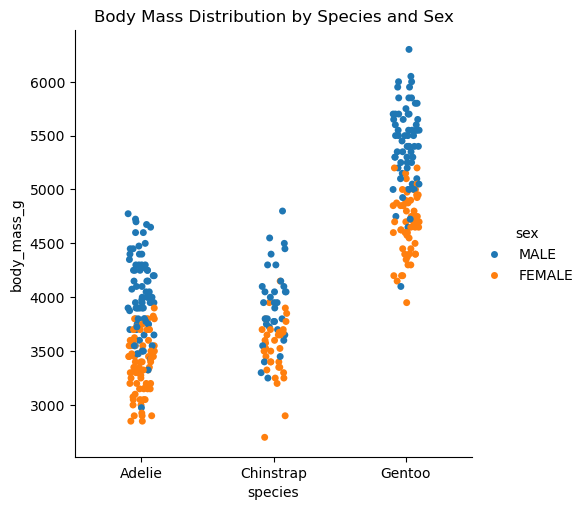

In [23]:
# Categorical Plot of Body Mass by Species and Sex
sns.catplot(data=penguins_data, x='species', y='body_mass_g', hue='sex')
plt.title('Body Mass Distribution by Species and Sex')
plt.show()

### Step 6: Model Building and Evaluation

The project evaluates the model's performance using various metrics such as precision, recall, f1-score, and accuracy. These metrics are used to assess how well the model is classifying the penguins and whether it’s doing so fairly across all species.

In [25]:
# Species Classification using Physical Traits
# Using a basic Random Forest classifier to predict species

# Preprocessing
X = penguins_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins_data['species']
X = X.fillna(X.mean())  # Fill NaN values in features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nSpecies Classification Report:")
print(classification_report(y_test, y_pred))


Species Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        50
   Chinstrap       0.89      0.94      0.92        18
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.97       103
   macro avg       0.96      0.97      0.96       103
weighted avg       0.97      0.97      0.97       103



### Key Findings

- **Gentoo**: The model performs perfectly for this species, achieving an accuracy of 100% for both precision and recall.
- **Adelie**: The model performs very well for Adelie, with high precision (98%) and recall (96%).
- **Chinstrap**: The model is somewhat less perfect for Chinstrap, but still performs reasonably well with precision (89%) and recall (94%).
- **Overall**: The model shows high accuracy (97%) and good balance across precision, recall, and F1-score, making it a robust classifier for this multi-class problem.

#### Possible Areas of Improvement:

- The model could be further improved on Chinstrap, as it has the lowest precision and recall. However, the performance is still solid overall.

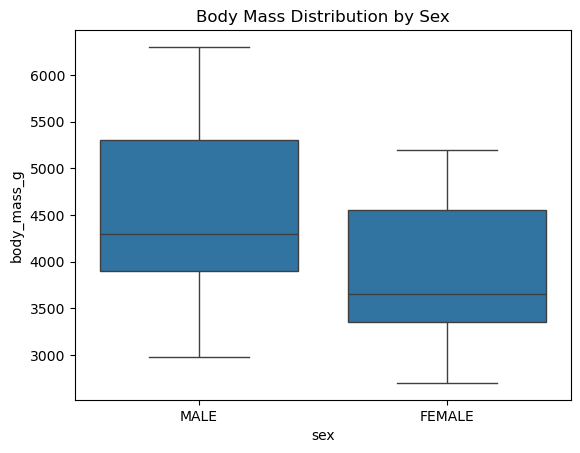

In [26]:
# Sex Differences in Physical Traits
# Visualize gender differences in body mass
sns.boxplot(x='sex', y='body_mass_g', data=penguins_data)
plt.title('Body Mass Distribution by Sex')
plt.show()

### Step 7: Feature Importance

The project aims to identify which features (culmen length, culmen depth, flipper length, body mass) are the most important for making accurate predictions. Understanding feature importance helps in interpreting the model and potentially reducing the complexity of the model by removing less important features.

In [27]:
# Feature Importance in Species Classification
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Species Classification:")
print(importance_df)


Feature Importance for Species Classification:
             Feature  Importance
0   culmen_length_mm    0.420640
2  flipper_length_mm    0.276732
1    culmen_depth_mm    0.205834
3        body_mass_g    0.096793


### Key Findings

- The model relies most heavily on culmen_length_mm (beak length) to make its species classification.
- Flipper length and culmen depth also play significant roles, while body mass is the least important feature for classification.
- This suggests that measurements related to the penguin's beak and flippers are the primary indicators the model uses to distinguish between different species of penguins.

## Conclusion

The **data distribution** revealed that the features have a moderate level of variability, with a slight skew in some measurements. However, the mean and median values for most features were quite close, indicating that the data is fairly balanced and not highly skewed. The variation in features like body mass showed more diversity, while others, like culmen depth, were less variable.

The **correlation analysis** highlighted strong relationships between certain features, particularly between flipper length and body mass, with a correlation of 0.87. This suggests that larger penguins tend to have longer flippers. There was also a moderate positive correlation between culmen length and flipper length, indicating that these two traits are somewhat related. Conversely, culmen depth showed weaker or inverse relationships with other features, indicating that it might play a different role in species classification.

In terms of **model performance**, the classifier achieved impressive results. It performed perfectly for Gentoo penguins, with 100% accuracy for both precision and recall. The model also performed exceptionally well for Adelie penguins, with precision at 98% and recall at 96%. While the model showed slightly lower performance for Chinstrap penguins (precision of 89% and recall of 94%), it still maintained strong performance across all three species, resulting in an overall accuracy of 97%. This demonstrates the model’s robustness and reliability as a classifier for this multi-class problem.

The **feature importance** analysis revealed that the model relies most heavily on culmen length (beak length) for classification. Flipper length and culmen depth were also significant, but body mass was the least important feature in distinguishing between species. This suggests that the model primarily uses beak and flipper measurements as the main indicators for species classification, reflecting the physical characteristics that are most distinguishing among penguin species.